# Code for Figure 5 part (a) and associated statistics reported in the text

Developed by Siobhan Powell, 2021. 

In [1]:
import os
os.chdir('../')

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

In [3]:
scens1 = ['_Timers9pm_noWPcontrol', '_Timers12am_noWPcontrol', '_TimersNone_noWPcontrol', '_TimersNone_WPcontrol_minpeak', '_TimersNone_WPcontrol_avgem']
scens2 = ['UniversalHome', 'HighHome', 'LowHome_HighWork', 'LowHome_LowWork']

vals1 = np.zeros((6, 5)) # overgeneration
tables_dfs1 = pd.DataFrame(np.zeros((6, 5)), 
                          index=['_Timers9pm_noWPcontrol', '_Timers12am_noWPcontrol', '_TimersNone_noWPcontrol', '_TimersNone_WPcontrol_minpeak', '_TimersNone_WPcontrol_avgem', '_TimersMixed_WPcontrol_minpeak'], 
                          columns=['UniversalHome', 'HighHome', 'LowHome_HighWork', 'LowHome_LowWork', 'BusinessAsUsual'])

vals2 = np.zeros((6, 5)) # ramping
tables_dfs2 = pd.DataFrame(np.zeros((6, 5)), 
                          index=['_Timers9pm_noWPcontrol', '_Timers12am_noWPcontrol', '_TimersNone_noWPcontrol', '_TimersNone_WPcontrol_minpeak', '_TimersNone_WPcontrol_avgem', '_TimersMixed_WPcontrol_minpeak'], 
                          columns=['UniversalHome', 'HighHome', 'LowHome_HighWork', 'LowHome_LowWork', 'BusinessAsUsual'])

for i, scen1 in enumerate(scens1):
    for j, scen2 in enumerate(scens2):
        penlevel = 1.0
        overgen = None
        try: 
            dpdf = pd.read_csv('Results/Fuel1_Solar25_Wind25/fuel1_solar2.5_wind2.5_'+scen2+scen1+'_penlevel'+str(penlevel)+'_storagebefore_dpdf_20211119.csv')
        except:
            try:
                dpdf = pd.read_csv('Results/Fuel1_Solar25_Wind25/fuel1_solar2.5_wind2.5_'+scen2+scen1+'_penlevel'+str(penlevel)+'_storagebefore_withstorage_dpdf_20211119.csv')
            except: 
                print('Error for ', penlevel, scen1, scen2)
                
        try:
            overgen = pd.read_csv('Results/Fuel1_Solar25_Wind25/fuel1_solar2.5_wind2.5_'+scen2+scen1+'_penlevel'+str(penlevel)+'_storagebefore_overgeneration.csv')
        except:
            try: 
                overgen = pd.read_csv('Results/Fuel1_Solar25_Wind25/fuel1_solar2.5_wind2.5_'+scen2+scen1+'_penlevel'+str(penlevel)+'_storagebefore_withstorage_overgeneration.csv')
            except:
                print('No overgeneration for ', scen1, scen2)
                    
        if overgen is not None:
            vals1[i, j] = np.abs(overgen.demand.sum())
            tables_dfs1.loc[scen1, scen2] = np.abs(overgen.demand.sum())
        
        prof1 = np.zeros((25, ))
        prof1[np.arange(0, 24)] = dpdf['demand'].values.reshape(-1, 24).mean(axis=0) # in original 
        prof1[24] = prof1[0]
        vals2[i, j] = np.max(prof1[1:] - prof1[:-1])
        tables_dfs2.loc[scen1, scen2] = np.max(prof1[1:] - prof1[:-1])
        
        
scen2 = 'BusinessAsUsual'
scen1 =  '_TimersMixed_WPcontrol_minpeak'
i = i+1
j = j+1
overgen = None
try: 
    dpdf = pd.read_csv('Results/Fuel1_Solar25_Wind25/fuel1_solar2.5_wind2.5_'+scen2+scen1+'_penlevel'+str(penlevel)+'_storagebefore_dpdf_20211119.csv')
except:
    try:
        dpdf = pd.read_csv('Results/Fuel1_Solar25_Wind25/fuel1_solar2.5_wind2.5_'+scen2+scen1+'_penlevel'+str(penlevel)+'_storagebefore_withstorage_dpdf_20211119.csv')
    except: 
        print('Error for ', penlevel, scen1, scen2)
        print('Results/Fuel1_Solar25_Wind25/fuel1_solar2.5_wind2.5_'+scen2+scen1+'_penlevel'+str(penlevel)+'_storagebefore_withstorage_dpdf_20211119.csv')

try: 
    overgen = pd.read_csv('Results/Fuel1_Solar25_Wind25/fuel1_solar2.5_wind2.5_'+scen2+scen1+'_penlevel'+str(penlevel)+'_storagebefore_overgeneration.csv')
except:
    try: 
        overgen = pd.read_csv('Results/Fuel1_Solar25_Wind25/fuel1_solar2.5_wind2.5_'+scen2+scen1+'_penlevel'+str(penlevel)+'_storagebefore_withstorage_overgeneration.csv')
    except:
        print('No overgeneration for ', scen1, scen2)        
        
if overgen is not None:
    vals1[i, j] = np.abs(overgen.demand.sum())
    tables_dfs1.loc[scen1, scen2] = np.abs(overgen.demand.sum())

prof = np.zeros((25, ))
prof[np.arange(0, 24)] = dpdf['demand'].values.reshape(-1, 24).mean(axis=0)
prof[24] = prof[0]
vals2[i, j] = np.max(prof[1:] - prof[:-1])
tables_dfs2.loc[scen1, scen2] = np.max(prof[1:] - prof[:-1])        




In [4]:
tables_dfs1*(1/1000)

,UniversalHome,HighHome,LowHome_HighWork,LowHome_LowWork,BusinessAsUsual
_Timers9pm_noWPcontrol,89.744685,28.587913,23.320143,16.706252,0.000000
_Timers12am_noWPcontrol,89.731571,28.539930,23.329240,16.645040,0.000000
_TimersNone_noWPcontrol,88.131579,28.286000,23.301096,16.607225,0.000000
_TimersNone_WPcontrol_minpeak,104.649506,27.031910,23.301096,16.607225,0.000000
_TimersNone_WPcontrol_avgem,77.262638,26.609227,23.301096,16.607225,0.000000
_TimersMixed_WPcontrol_minpeak,0.000000,0.000000,0.000000,0.000000,27.105701


In [5]:
tables_dfs2*(1/1000)

,UniversalHome,HighHome,LowHome_HighWork,LowHome_LowWork,BusinessAsUsual
_Timers9pm_noWPcontrol,9.938152,6.581678,2.127633,2.409835,0.000000
_Timers12am_noWPcontrol,7.717366,4.942658,1.983514,2.178150,0.000000
_TimersNone_noWPcontrol,8.225511,5.536765,2.063288,2.321612,0.000000
_TimersNone_WPcontrol_minpeak,8.673066,6.129785,2.777165,2.712791,0.000000
_TimersNone_WPcontrol_avgem,8.155612,5.264889,1.954554,2.160489,0.000000
_TimersMixed_WPcontrol_minpeak,0.000000,0.000000,0.000000,0.000000,5.869976


In [6]:
(tables_dfs2*(1/1000)).round(2).to_csv('MainPlotting/Tables/fig5a_ramping.csv')
(tables_dfs1*(1/1000)).round(2).to_csv('MainPlotting/Tables/fig5a_overgeneration.csv')

In [7]:
np.round((1/1000)*vals2, 2)

array([[9.94, 6.58, 2.13, 2.41, 0.  ],
       [7.72, 4.94, 1.98, 2.18, 0.  ],
       [8.23, 5.54, 2.06, 2.32, 0.  ],
       [8.67, 6.13, 2.78, 2.71, 0.  ],
       [8.16, 5.26, 1.95, 2.16, 0.  ],
       [0.  , 0.  , 0.  , 0.  , 5.87]])

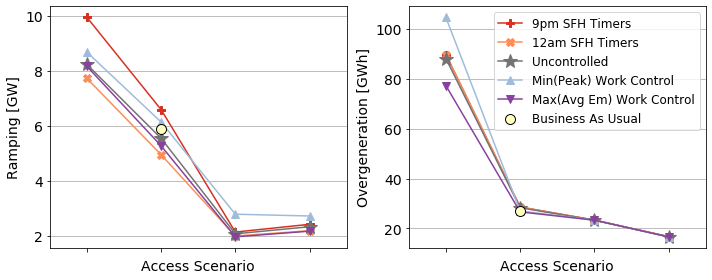

In [8]:
plt.figure(figsize=(10, 4))
titles = ['1', '2', '3', '4']

colors = ['#d7301f', '#fc8d59', '#737373', '#9ebcda', '#88419d']
control_labels = ['9pm SFH Timers', '12am SFH Timers', 'Uncontrolled', 'Min(Peak) Work Control', 'Max(Avg Em) Work Control']

plt.subplot(121)
plt.xlabel('Access Scenario', fontsize=14)
plt.ylabel('Ramping [GW]', fontsize=14)
plt.xticks(np.arange(0, 4), labels=[], fontsize=12)

ms = [8, 8, 14, 8, 8]
lines = ['-P', '-X', '-*', '-^','-v']
for control_idx in range(5):
    plt.plot(np.arange(0, 4), (1/1000)*vals2[control_idx, np.arange(0, 4)], lines[control_idx], color=colors[control_idx], label=control_labels[control_idx], zorder=1, markersize=ms[control_idx])
plt.scatter(np.array([1]), np.array((1/1000)*tables_dfs2.loc['_TimersMixed_WPcontrol_minpeak', 'BusinessAsUsual']), marker='o', color='#ffffbf', edgecolors='k', s=100, zorder=2, label='Business As Usual')
plt.xlim([-0.5, 3.5])
plt.yticks(np.arange(2, 11, 2), fontsize=14)
plt.gca().set_axisbelow(True)        
plt.gca().grid(axis='y')


plt.subplot(122)


plt.xticks(np.arange(0, 4), labels=[], fontsize=12)
plt.xlabel('Access Scenario', fontsize=14)
plt.yticks([20, 40, 60, 80, 100], fontsize=12)
plt.xlim([-0.5, 3.5])


lines = ['-P', '-X', '-*', '-^','-v']
ms = [8, 8, 14, 8, 8]
edgecolors=[colors[0], colors[1],'k', colors[2], colors[3]]
# vals_all = [vals1, vals2, vals0, vals3, vals4]
# for j, vals in enumerate(vals_all):
#     plt.plot(np.arange(0, 4), (1/1000)*vals[:, 8], lines[j], color=colors[j], label=control_labels[j], zorder=1, markersize=ms[j])
for control_idx in range(5):
    plt.plot(np.arange(0, 4), (1/1000)*vals1[control_idx, np.arange(0, 4)], lines[control_idx], color=colors[control_idx], label=control_labels[control_idx], zorder=1, markersize=ms[control_idx])
plt.ylabel('Overgeneration [GWh]', fontsize=14)
# plt.scatter(np.array([1]), np.array((1/1000)*vals_bau[8]), marker='o', color='#ffffbf', edgecolors='k', s=100, zorder=2, label='Business As Usual')
plt.scatter(np.array([1]), np.array((1/1000)*tables_dfs1.loc['_TimersMixed_WPcontrol_minpeak', 'BusinessAsUsual']), marker='o', color='#ffffbf', edgecolors='k', s=100, zorder=2, label='Business As Usual')
            
plt.legend(fontsize=12)
plt.yticks(np.arange(20, 110, 20), fontsize=14)
plt.gca().set_axisbelow(True)        
plt.gca().grid(axis='y')

plt.tight_layout()
plt.savefig('MainPlotting/Plots/fig5a_option1.pdf', bbox_inches='tight')
plt.show()

# Statistics

In [19]:
print('Worst case overgeneration: ')
(tables_dfs1.max()*(1/1000)).round(3)

Worst case overgeneration: 


UniversalHome       104.650
HighHome             28.588
LowHome_HighWork     23.329
LowHome_LowWork      16.706
BusinessAsUsual      27.106
dtype: float64

In [18]:
print('Worst case ramping: ')
(tables_dfs2.max()*(1/1000)).round(3)

Worst case ramping: 


UniversalHome       9.938
HighHome            6.582
LowHome_HighWork    2.777
LowHome_LowWork     2.713
BusinessAsUsual     5.870
dtype: float64

In [24]:
print('LowHome as fraction of UniversalHome ramping: ', tables_dfs2.max()['LowHome_HighWork'] / tables_dfs2.max()['UniversalHome'])

LowHome as fraction of UniversalHome ramping:  0.2794447897074026


In [30]:
noev_scenario_overgen = pd.read_csv('Results/NoEVs_year2030_solar2.5x_wind2.5x_overgeneration.csv')
print('Overgeneration in no EV case [Gwh]:', (1/1000)*np.abs(noev_scenario_overgen.demand.sum()))

Overgeneration in no EV case [Gwh]: 605.355599999999
